# Machine Learning in Python - Group Project 1

**Due Friday, March 10th by 16.00 pm.**

Contributor Names:

Qiming Xiong (UUN: s2442309)

Yifan Wu (UUN: s2316499)

Jiaqi Zhou (UUN: s2318871)

## General Setup

In [1]:
# Add any additional libraries or submodules below

# Data libraries
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn import preprocessing
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules that are necessary
import sklearn

In [2]:
# Load data
data = pd.read_csv("the_office.csv")

## 1. Introduction

NBC Universal decides to create of a special reunion episode of The Office. While they need to figure out what features are the most important in making episodes with higher rating. Our team's goal is to use the data of the series to build a model that can predict the IMDB rating based on different types of features, such as `writer`, `air_date`, `n_lines`, etc. There are 13 different features in total, which may or may not contribute to the rating of a single episode. The discreption of each feature are as follows:

- season - Season number of the episode
- episode - Episode number within a season
- episode_name - Episode name
- director - Episode director(s), names are separated by ;
- writer - Episode writer(s), names are separated by ;
- imdb_rating - Episode rating on IMDB
- total_votes - Numbers of ratings for episode on IMDB
- air_date - Original air date of episode
- n_lines - Number of spoken lines in episode
- n_directions - Number of lines containing a stage direction
- n_words - Number of dialog words in episode
- n_speak_char - Number of different characters with spoken lines in episode
- main_chars - Main characters appearing in episode (main characters were determined to be characters appearing in more than 1/2 of the episodes)

First, we do conduct exploratory data analysis, in order to find some useful patterns of the data. We get insights into all numerical and categorical features of the dataset, find relationship between each pair, and gain a preliminary knowledge about features which may contribute the most to the final IMDB rating. And the description also allows us to decide whether to keep or discard some certain features, and do necessary feature engineering.

Second, we decide which features are useful and which features need to be droped. Then we do the feature engineering,including data preprocessing, feature selection and binary encoding. Binary encoding transforms our categorical variables into binary format depeding on two states (represented by the digits 0 and 1).

Feature transformation undoubtedly increases the total number of features. To counter this, we will combine some features into a group based on the frequencies in which they appear. Features with relatively high frequency will be divided into groups with different conditions. On the other hand, features with frequency levels below a certain threshold will be discarded. With this, we managed to reduce the total number of features down to a manageable size.

The next step is to fit a regression model onto the transformed data. Having tested the data onto different types of models and comparing the root mean square error(RMSE), our team decided to prioritize Lasso regression.

Finally, in order to optimize the Lasso model, our team will perform a grid-search method to find the tuning parameter alpha that can minimize the RMSE.

## 2. Exploratory Data Analysis and Feature Engineering

### 2.1 Exploratory Data Analysis

First, we do the exploratory data analysis. It helps us to gain some insights into the data, identify patterns, and check for any outliers or anomalies. Before dive into the analysis, we first load the data and check the available columns.

In [3]:
data.head()

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...


From the output, we can see that the dataset contains information about each episode of "The Office," including the season number, episode number, episode name, director, writer, IMDB rating, total votes, air dates, lines, words, and the main characters. Then, we check the descriptive statistics of the numerical variables in the dataset.

In [4]:
data.describe()

,season,episode,imdb_rating,total_votes,n_lines,n_directions,n_words,n_speak_char
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,5.462366,12.478495,8.250538,2129.543011,296.397849,50.150538,3053.510753,20.693548
std,2.398464,7.233710,0.535168,790.787586,81.998568,23.941797,799.271717,5.092407
min,1.000000,1.000000,6.700000,1393.000000,131.000000,11.000000,1098.000000,12.000000
25%,3.000000,6.000000,7.900000,1628.500000,255.250000,34.000000,2670.250000,17.000000
50%,6.000000,12.000000,8.200000,1954.000000,281.000000,46.000000,2872.500000,20.000000
75%,7.750000,18.000000,8.600000,2385.000000,314.500000,60.000000,3141.000000,23.000000
max,9.000000,28.000000,9.700000,7934.000000,625.000000,166.000000,6076.000000,54.000000


From the output, we can see that, the average rating of the episodes is 8.25, with a minimum rating of 6.7 and a maximum rating of 9.7. The average number of total votes is 2130, with a minimum of 1393 and a maximum of 7934. The average number of speak characters is 21, with a minimum of 12 and a maximum of 54. Now, let's make a plot to count the IMDB ratings, the value we are looking to maximise.

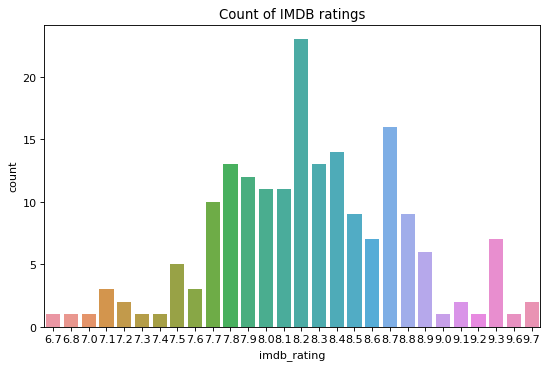

In [5]:
# Count
sns.countplot(x = data['imdb_rating'])
plt.title('Count of IMDB ratings');

From the countplot, we can see that the rating of all episodes obey normal distibution, most of the episodes have a IMDB rating between 7.7 and 8.8. Let's then draw a plot of IMDB rating by season.

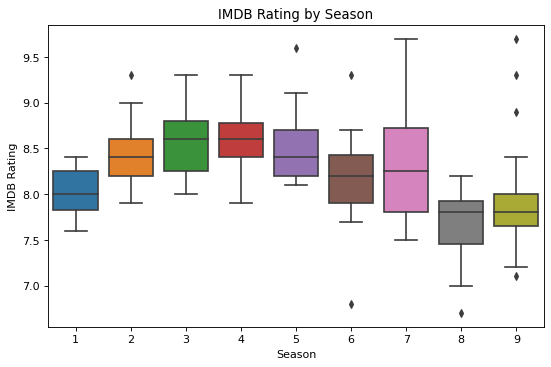

In [6]:
# IMDB Rating by season
sns.boxplot(x='season', y='imdb_rating', data=data)
plt.title('IMDB Rating by Season')
plt.xlabel('Season')
plt.ylabel('IMDB Rating')
plt.show()

From the boxplot, we can see that season 3 and season 4 has the highest median IMDB rating, while season 8 has the lowest. And season 7 has a wider range of IMDB ratings than others. Next, we make a plot of IMDB rating over episodes.

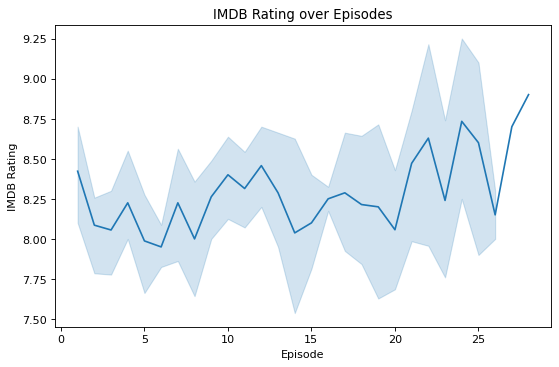

In [7]:
# IMDB rating over episodes
sns.lineplot(x='episode', y='imdb_rating', data=data)
plt.title('IMDB Rating over Episodes')
plt.xlabel('Episode')
plt.ylabel('IMDB Rating')
plt.show()

From the lineplot, we can see that there are fluctuations in the IMDB rating over the episodes. The episodes in the middle as well as near the end often have higher rating. In order to look into the pairwise relationships between different features of the dataset, we create a pairplot.

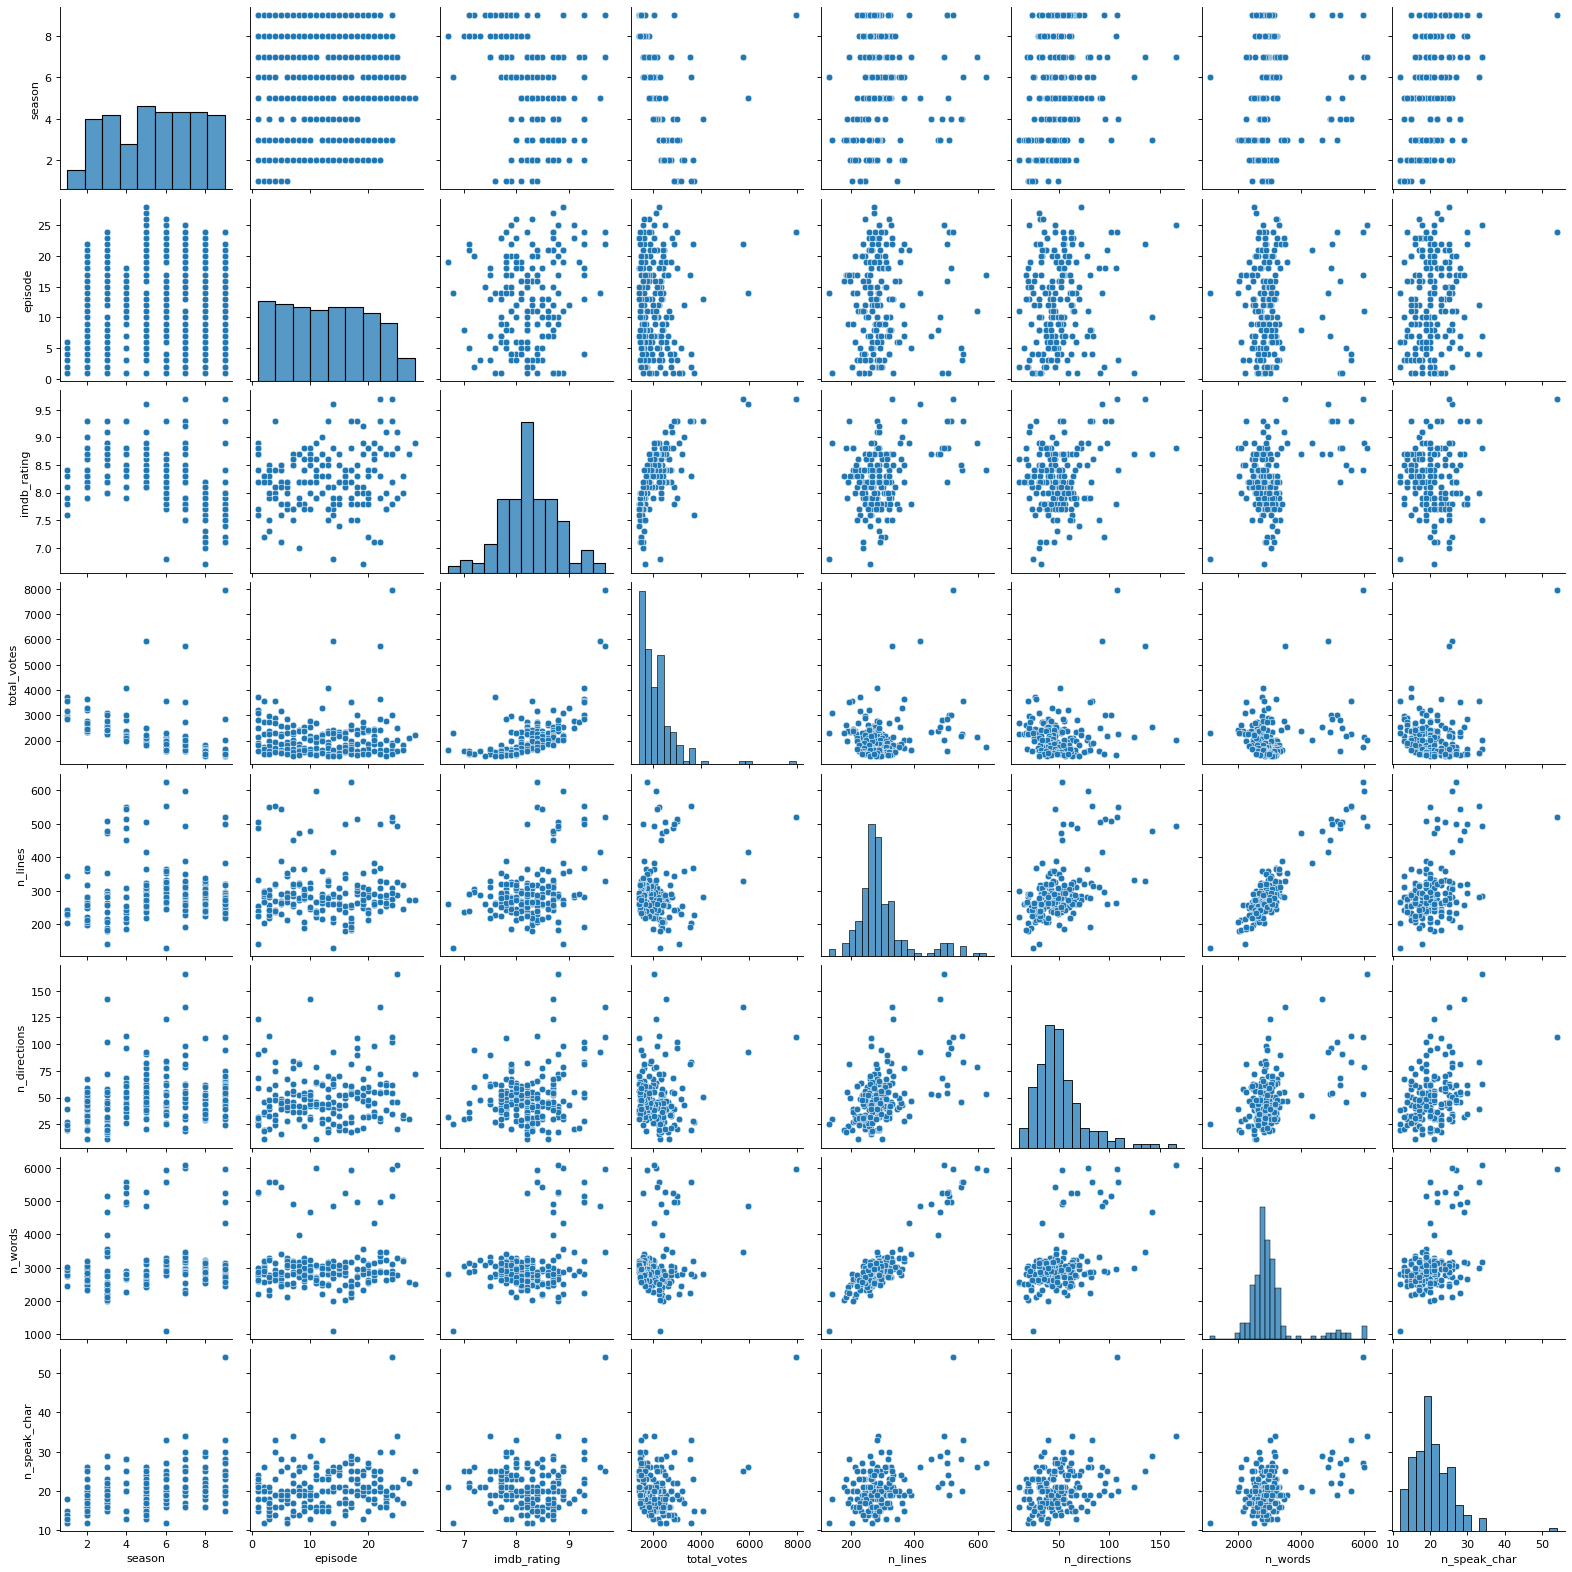

In [8]:
sns.pairplot(data);

The pairplot shows that the `imdb_rating` has a positive correlation with the `total_votes` feature, while there is a clear linear relationship between the `n_words` feature and the `n_lines` feature, we will do some feature engineering with these variables. Then, we draw a heat map to make further verification.

/var/folders/5q/sgmbt24138qd3ksr40xd8hh40000gn/T/ipykernel_82609/555444547.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


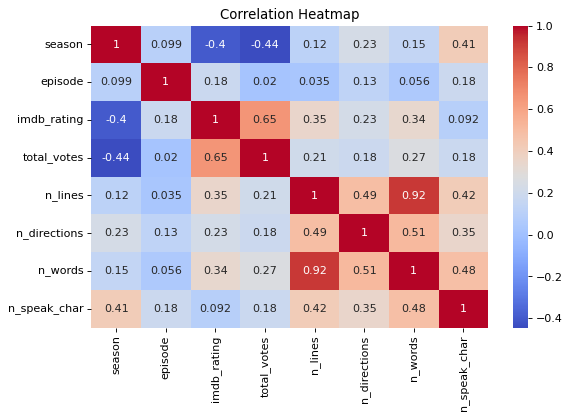

In [9]:
# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the correlation heatmap, we can also see that, there is a positive correlation between the IMDB rating and the number of IMDB votes, and there is a positive correlation near linear relation between the number of words and the number of the lines.

Now we focus on the categorical features in the dataset. We first draw a barplot to visualize the distribution of directors.

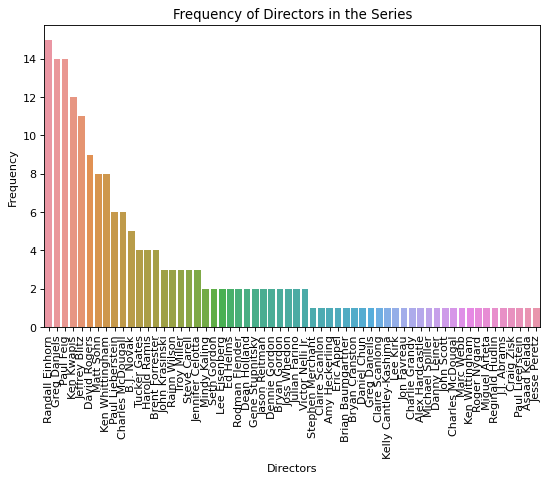

In [10]:
# Function to split names
def split_names(character, df):
    char=df[character]
    new_char=[]
    for i in range(len(char)):
        new_char.extend(char[i].split(';'))
    return new_char

# Creating a barplot of the directors
new_director = pd.Series(split_names('director', data))
director_counts = new_director.value_counts()
sns.barplot(x = director_counts.index, y = director_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.title('Frequency of Directors in the Series')
plt.show()

From the barplot, we can see that most of the episodes are directed by four directors: Randall Einhorn, Greg Daneils, Paul Feig, and Ken Kwapis. Then, we create a wordcloud for writers.

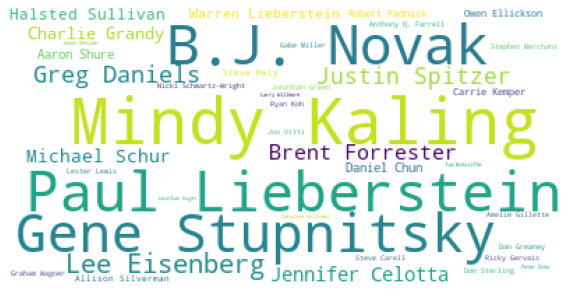

In [11]:
new_writer = pd.Series(split_names('writer', data))
writer_counts = new_writer.value_counts()
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate_from_frequencies(writer_counts)
    
# plot the wordcloud
plt.figure(figsize=(9,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the wordcloud, we can see that most of the scripts are written by three directors: Mindy Kaling, Paul Lieberstein, and B.J. Novak. With the same methods, we can find that five characters appear the most in the whole TV series: Dwight, Kevin, Jim, Pam and Angela.

In conclusion, from the exploratory data analysis, we find that the number of total votes has more correlation with the IMDB rating, but it is a variable that we cannot control before episode production, so we may consider to drop this item in the follow-up work. The number of words and the number of lines seems has huge linear relation with each other, so we consider to only keep the one with better  representation. The most frequently appeared directors, writers and main characters are been found, which indicate the most influential factors that contribute to IMDB rating.

### 2.2 Feature Engineering

After a basic look at the original dataset, it's time to move on to feature engineering. Feature engineering is a crucial step in the machine learning pipeline that can have a significant impact on the performance of the model. It involves selecting, transforming, and creating new features from the original dataset to improve the accuracy and generalizability of the model.The goal of feature engineering is to extract relevant information from the data and present it in a way that allows the machine learning algorithm to learn meaningful patterns and relationships.  
In this part, we are going to present four steps that can make the original data to be more compatible with our modeling needs. We will first do the data preprocessing because we found some 'stains' in the original data. Then, we will pick some features useful and delete some features that are not important or problomatic. Next, for those categorical data, we need to perform feature encoding. Also, do standardization on continuous data.

#### 2.2.1 Data Preprocessing

For data preprocessing, therea are mainly two aspects should be noticed. The first one is that there has misspelling of the same person's name in the <mark>director</mark> column. We can see that shown below. For example, **Greg Daniels** was misspelled as **Greg Daneils**, **Charles McDougall** was misspelled as **Charles McDougal**. Thus, we decided to replace those wrong names to the correct one.

In [12]:
data[['director']].iloc[[12,21]]

,director
12,Greg Daneils
21,Greg Daniels


In [13]:
data[['director']].iloc[[15,22]]

,director
15,Charles McDougall
22,Charles McDougal


In [14]:
#preprocessing
#replace
data['director']=data['director'].replace('Greg Daneils', 'Greg Daniels')
data['director']=data['director'].replace('Charles McDougal', 'Charles McDougall')
data['director']=data['director'].replace('Ken Wittingham', 'Ken Whittingham')
data['director']=data['director'].replace('Paul Lieerstein', 'Paul Lieberstein')
data['director']=data['director'].replace('Claire Scanlong', 'Claire Scanlon')

The second one is that: in the <mark>director</mark> and <mark>writer</mark> columns, there are some values which are a combination of several people (use semicolon to seperate), and the order of people in those combinations are different, even though they are actually the same.This situation may affect the performance of the model, i.e. the model will treat the two combinations as two different combinations. Below are some examples.

In [15]:
data[['director']].iloc[[85,96]]

,director
85,Gene Stupnitsky;Lee Eisenberg
96,Lee Eisenberg;Gene Stupnitsky


In [16]:
data[['director']].iloc[[85,96]]

,director
85,Gene Stupnitsky;Lee Eisenberg
96,Lee Eisenberg;Gene Stupnitsky


Then we find the occurence of this situation and sort it to solve the problem.

In [17]:
director=data['director']
new_director=[]
for i in range(len(director)):
    str_to_list=director[i].split(';')
    new_director.append(';'.join(sorted(str_to_list)))
data['director']=new_director

writer=data['writer']
new_writer=[]
for i in range(len(writer)):
    str_to_list=writer[i].split(';')
    new_writer.append(';'.join(sorted(str_to_list)))
data['writer']=new_writer

#### 2.2.2 Feature Selection

In this section, the goal is to eliminate features that we believe contribute nothing or very little to the response variable in the future model. Firstly, we would like to remove <mark>episode</mark>, <mark>episode_name</mark> and <mark>air_date</mark>. The reason is intuitive. The show has nine seasons, each of which has a number of episodes, so the exact number of episodes does not provide a meaningful statistical pattern in our opinion. Also, since the name of each episode is just a string of words, and our model does not consider natural language processing, the episode names are also meaningless. As for the air date of each episode, it only represents that the series is weekly updated, which also hardly provides sufficient statistical significance. So first we consider removing these three items from the data.

Then, we decided to remove <mark>total_votes</mark> column. The reason is also easy, the number of votes can only be collected after the episode has aired, which implies that this feature is not meaningful in a model that predicts the rating of a episode after it has aired.

For <mark>n_lines</mark> and <mark>n_words</mark>, from the project description, the former one represents Number of spoken lines in one episode, while the latter one represents Number of dialog words in one episide. Intuitively, we can assume that there may be a closer connection between these two features. Let's see the correlation between them.

In [18]:
print('The correlation between n_lines and n_words:')
print(data['n_lines'].corr(data['n_words']))

The correlation between n_lines and n_words:
0.9159588565722412


Apparently, the correlation between <mark>n_lines</mark> and <mark>n_words</mark> is really large, implies a strong, positive association between these two variables, or we can say there is a strong collinearity between these two. Thus, we can just keep one of them.  
The question is how to choose the appriate one. From the correlation plot in Exploratory Data Analysis part, the correlation coefficient s between <mark>n_lines</mark> (<mark>n_words</mark>) and <mark>imdb_rating</mark> are almost the same, so we can explore the variance of each of them. 

In [19]:
print('variance of n_lines:',np.var(data['n_lines']))
print('variance of n_words:',np.var(data['n_words']))

variance of n_lines: 6687.6159093536835
variance of n_words: 635400.6799919064


From the results above, it's obvious that the variance of <mark>n_words</mark> is far greater than that of <mark>n_lines</mark>,which means that the distribution of the number of words in the script dialogue is scattered and varies significantly, and selecting this as a feature is beneficial to the accuracy of the model.

The next controversial feature is <mark>main_chars</mark>. This feature indicates main characters appearing in episode. Look at the values in this column, all of values are some combinations of several characters. So, we would like to separate main characters into many single characters and explore the average rating of each one. The result can directly determine whether this feature can be kept or removed.

First split <mark>main_chars</mark> and create a new dataframe that contains all single main character. This new dataframe will have 2532 rows. 

In [20]:
char_sp = data['main_chars'].str.split(';', expand=True)
char = char_sp.stack().reset_index(level=1, drop=True).to_frame('char_sp')
data_mc= pd.concat([data.drop(['main_chars'], axis=1), char], axis=1)
data_mc= data_mc.reset_index().drop(['index'], axis=1)
print(data_mc.shape)
data_mc.head(5)

(2532, 13)


,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,char_sp
0,1,1,Pilot,Ken Kwapis,Greg Daniels;Ricky Gervais;Stephen Merchant,7.6,3706,2005-03-24,229,27,2757,15,Angela
1,1,1,Pilot,Ken Kwapis,Greg Daniels;Ricky Gervais;Stephen Merchant,7.6,3706,2005-03-24,229,27,2757,15,Dwight
2,1,1,Pilot,Ken Kwapis,Greg Daniels;Ricky Gervais;Stephen Merchant,7.6,3706,2005-03-24,229,27,2757,15,Jim
3,1,1,Pilot,Ken Kwapis,Greg Daniels;Ricky Gervais;Stephen Merchant,7.6,3706,2005-03-24,229,27,2757,15,Kevin
4,1,1,Pilot,Ken Kwapis,Greg Daniels;Ricky Gervais;Stephen Merchant,7.6,3706,2005-03-24,229,27,2757,15,Michael


Then calculate the average imdb_rating of episodes in which each main character appeared, and compute the variance of it.

In [21]:
data_mc=data_mc[['imdb_rating','char_sp']].groupby('char_sp').mean()
print(data_mc.T)

char_sp          Andy   Angela     Creed  Darryl    Dwight      Erin  \
imdb_rating  8.243357  8.24386  8.269466    8.16  8.250538  8.063265   

char_sp           Jim     Kelly     Kevin  Meredith   Michael     Oscar  \
imdb_rating  8.258378  8.330986  8.243333  8.240458  8.409489  8.234146   

char_sp           Pam   Phyllis      Ryan   Stanley      Toby  
imdb_rating  8.258242  8.259394  8.284892  8.273333  8.258333  


In [22]:
print('variance of average imdb_rating:',np.var(data_mc['imdb_rating']))

variance of average imdb_rating: 0.00457721479159709


So, the variance of average rating for each main character is really close to 0, which means he distribution of average episode scores for the episodes in which these main characters appear is almost uniformly distributed, indicating that the appearance of these main characters has a negligible effect on the ratings, and we therefore believe that we can disregard this feature in the model. To think differently, we start from the episode itself. The Office is an American sitcom that tells the daily stories of employees in a corporate office. Therefore, any main character should be liked by the audience, which means that the presence or absence of a character in an episode does not significantly affect the performance of the episode.  
In any case, we decided to remove <mark>main_chars</mark>.

Thus far, we have discussed which features should be removed. The result is shown below.

In [23]:
data_sub=data.drop(['episode','episode_name','air_date','total_votes','n_lines','main_chars'], axis=1)
data_sub.head(5)

,season,director,writer,imdb_rating,n_directions,n_words,n_speak_char
0,1,Ken Kwapis,Greg Daniels;Ricky Gervais;Stephen Merchant,7.6,27,2757,15
1,1,Ken Kwapis,B.J. Novak,8.3,20,2808,12
2,1,Ken Whittingham,Paul Lieberstein,7.9,21,2769,13
3,1,Bryan Gordon,Michael Schur,8.1,24,2939,14
4,1,Greg Daniels,Greg Daniels,8.4,49,2437,18


Furthermore, look at the counts for all directors and writers.

In [24]:
print(pd.DataFrame(data_sub['director'].value_counts()).T)

          Greg Daniels  Randall Einhorn  Paul Feig  Ken Kwapis  Jeffrey Blitz  \
director            15               15         14          12             11   

          David Rogers  Ken Whittingham  Matt Sohn  Charles McDougall  \
director             9                9          8                  7   

          Paul Lieberstein  ...  J.J. Abrams  Harold Ramis;Seth Gordon  \
director                 7  ...            1                         1   

          Marc Webb  Roger Nygard  Seth Gordon  Reginald Hudlin  \
director          1             1            1                1   

          Miguel Arteta  Asaad Kelada  Stephen Merchant  Jesse Peretz  
director              1             1                 1             1  

[1 rows x 55 columns]


In [25]:
print(pd.DataFrame(data_sub['writer'].value_counts()).T)

        Mindy Kaling  B.J. Novak  Paul Lieberstein  \
writer            20          15                13   

        Gene Stupnitsky;Lee Eisenberg  Justin Spitzer  Brent Forrester  \
writer                             13               9                9   

        Greg Daniels  Jennifer Celotta  Michael Schur  \
writer             9                 8              7   

        Halsted Sullivan;Warren Lieberstein  ...  Jonathan Huges  \
writer                                    7  ...               1   

        Charlie Grandy;Daniel Chun  Jason Kessler  Greg Daniels;Mindy Kaling  \
writer                           1              1                          1   

        Michael Schur;Paul Lieberstein  Greg Daniels;Jennifer Celotta  \
writer                               1                              1   

        Caroline Williams  Ricky Gervais;Stephen Merchant  Larry Willmore  \
writer                  1                               1               1   

        Tim McAuliffe  
wri

In fact, although there are many people who have written or directed, there are many who have only written or directed once, and the performance of the episode for which these people were responsible was not enough to be seen as meaningful by the model. Therefore, to minimize the number of variables after encoding, we decided to remove those episodes that included both a director who directed only one episode and a writer who was responsible for only one episode of the script.

In [26]:
print('shape of data before cleaning:',data_sub.shape)

director_counts=data_sub['director'].value_counts()
writer_counts=data_sub['writer'].value_counts()

data_sub=data_sub[data_sub['director'].isin(director_counts[director_counts>1].index)&
                 data_sub['writer'].isin(writer_counts[writer_counts>1].index)]
data_sub=data_sub.reset_index(drop=True)
print('shape of data after cleaning:',data_sub.shape)

shape of data before cleaning: (186, 7)
shape of data after cleaning: (152, 7)


#### Encoding

Feature encoding is a crucial step in preparing data for machine learning algorithms. It involves transforming raw input data into a numerical representation that can be easily interpreted by machine learning models. Feature encoding can take many forms, including one-hot encoding, label encoding, and binary encoding. One-hot encoding is a common technique that creates a binary column for each category in a categorical feature, where each column indicates whether the instance belongs to that category or not. Label encoding assigns each unique value in a categorical feature to a unique integer. Binary encoding is a hybrid technique that combines aspects of one-hot and label encoding to create compact, efficient representations of categorical data. Feature encoding is an essential step in data preprocessing that can greatly impact the performance of machine learning models.

In [27]:
print('number of unique values in season:',len(data_sub['season'].unique()))
print('number of unique values in director:',len(data_sub['director'].unique()))
print('number of unique values in writer:',len(data_sub['writer'].unique()))

number of unique values in season: 9
number of unique values in director: 31
number of unique values in writer: 32


We can see that the number of unique values of those categorical data are very large. When the number of unique values in a categorical variable is large, using one-hot encoding can result in a high-dimensional feature space, which can be computationally expensive and may lead to overfitting. In such cases, binary encoding can be a better alternative as it offers a more compact representation of the categorical data.

Binary encoding works by representing each unique value in the categorical variable as a binary string. The length of the binary string is determined by the number of unique values in the variable. Each binary digit corresponds to a power of two, with the rightmost digit corresponding to 2^0, the next digit to 2^1, and so on. For each instance, the binary string representing its category is concatenated with the numerical values of other features to form the input vector.

Binary encoding can be an efficient way to encode categorical variables with large numbers of unique values, as it requires fewer dimensions than one-hot encoding while still preserving information about the categories. Therefore, we choose to use binary encoding. Before applying it, we found that the number of unique values in <mark>writer</mark> is 32, just larger than 31. The binary encoding can store 2^n-1 values, so in order to maximize the storage use, we choose to randomly remove data whose writer counts is 2.

In [28]:
data_sub=data_sub[data_sub.writer!='Anthony Q. Farrell']

Below is the result.

In [29]:
#encoding
data_sub['season']=data_sub['season'].astype(str)
be_season = ce.BinaryEncoder()
transformed_season=be_season.fit_transform(data_sub[['season']])
data_sub=pd.concat([data_sub,transformed_season],axis=1).drop(['season'],axis=1)

be_director = ce.BinaryEncoder()
transformed_director=be_director.fit_transform(data_sub[['director']])
data_sub=pd.concat([data_sub,transformed_director],axis=1).drop(['director'],axis=1)

be_writer = ce.BinaryEncoder()
transformed_writer=be_writer.fit_transform(data_sub[['writer']])
data_sub=pd.concat([data_sub,transformed_writer],axis=1).drop(['writer'],axis=1)

In [30]:
print(data_sub.shape)
data_sub.head(5)

(150, 18)


,imdb_rating,n_directions,n_words,n_speak_char,season_0,season_1,season_2,season_3,director_0,director_1,director_2,director_3,director_4,writer_0,writer_1,writer_2,writer_3,writer_4
0,8.3,20,2808,12,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,7.9,21,2769,13,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,8.1,24,2939,14,0,0,0,1,0,0,0,1,1,0,0,0,1,1
3,8.4,49,2437,18,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,8.7,59,2812,20,0,0,1,0,0,0,1,0,0,0,0,1,0,1


#### Standardization

The final section is data standardization, also known as data normalization. This is a process of transforming data to have a standard scale and distribution. 

Data standardization can improve the performance of machine learning models by ensuring that all input features are on a similar scale. When the scale of features varies widely, some features may dominate the performance of the model, while others may have little impact. Data normalization can help avoid this problem and ensure that all features are given equal importance in the model.

We want to just apply MinMax scaling on both three continuous features, but MinMax scaling can be sensitive to outliers, as the range of the data is determined by the minimum and maximum values, which can be heavily influenced by outliers. So we first draw the boxplot.

Below is the boxlplots for the three continuous features: <mark>n_directions</mark>, <mark>n_words</mark>, <mark>n_speak_char</mark>

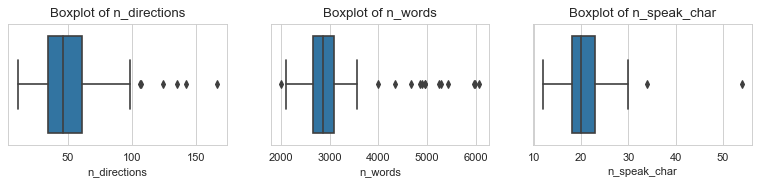

In [31]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 2))
sns.boxplot(x="n_directions", data=data_sub[['n_directions']], ax=axs[0])
axs[0].set_title("Boxplot of n_directions")
sns.boxplot(x="n_words", data=data_sub[['n_words']], ax=axs[1])
axs[1].set_title("Boxplot of n_words")
sns.boxplot(x="n_speak_char", data=data_sub[['n_speak_char']], ax=axs[2])
axs[2].set_title("Boxplot of n_speak_char")
plt.show()

We can see that there are not many outliers for those features, so we just use MinMax scaling. Let's see the final data after all process of feature enginerring.

In [32]:
#Standardization
scaler = MinMaxScaler()
data_sub[['n_directions','n_words','n_speak_char']]=scaler.fit_transform(data_sub[['n_directions','n_words','n_speak_char']])
data_sub.head(5)

,imdb_rating,n_directions,n_words,n_speak_char,season_0,season_1,season_2,season_3,director_0,director_1,director_2,director_3,director_4,writer_0,writer_1,writer_2,writer_3,writer_4
0,8.3,0.058065,0.200978,0.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,7.9,0.064516,0.191443,0.023810,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,8.1,0.083871,0.233007,0.047619,0,0,0,1,0,0,0,1,1,0,0,0,1,1
3,8.4,0.245161,0.110269,0.142857,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,8.7,0.309677,0.201956,0.190476,0,0,1,0,0,0,1,0,0,0,0,1,0,1


## 3. Model Fitting and Tuning

### 3.1 Data Split

In this part, we call train_test_split to split the model, using 80% of the training set and 20% of the test set, and end up with 120 data and 17 features to fit the model.

In [33]:
from sklearn.model_selection import train_test_split

X = data_sub.drop(['imdb_rating'], axis = 1)
y = data_sub['imdb_rating']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [34]:
x_train.shape,y_train.shape

((120, 17), (120,))

### 3.2 Baseline Model

#### Linear Regression

For a dataset of 17 features in 120 data, which is considered high-dimensional, a linear regression model can be overly complex and can lead to over-fitting problems. This is because the number of parameters in a linear regression model increases as the number of features increases. If the training data is too small, it may not be possible to fit the parameters correctly, so regularisation needs to be applied to avoid overfitting.


#### Polynomial Regression

Polynomial regression models usually have high flexibility and complexity, which can increase features and accurately fit training data, thereby reducing the mean squared error on the training set. However, they may perform poorly on test data. When fitting data with high-degree polynomials, the model may become overfit to the training data, leading to overfitting issues. Moreover, for high-dimensional data, polynomial regression models may lead to an explosive increase in the number of parameters, resulting in the sparsity issue, where the model needs to use a large number of parameters to fit the data, but only a few parameters have a significant impact.

#### Decision Tree

Decision tree model also has a high degree of flexibility and complexity, allowing it to accurately fit the training data, but may perform poorly on test data. When the tree depth is large or the splitting conditions are too strict, overfitting can easily occur. Additionally, the structure of the decision tree is easily influenced by noise and random fluctuations in the data, and the same dataset may lead to different decision trees. In high-dimensional data, the decision tree may face feature selection problems. If all features are used, the decision tree may become large, leading to overfitting problems. However, if only a subset of features are used, some important features may be missed, leading to a decrease in model performance.

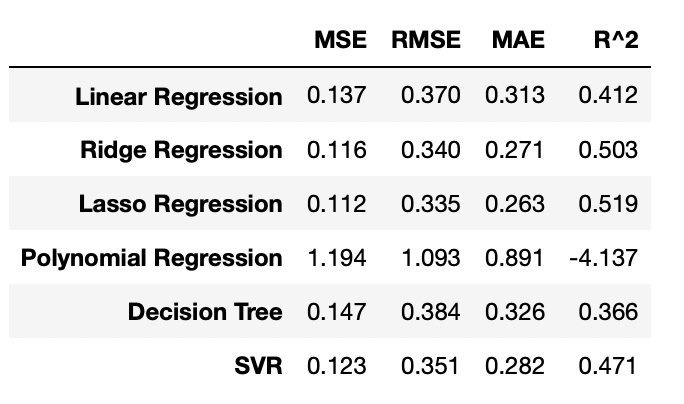

In [35]:
from IPython.display import Image
Image(filename='model evaluation.png',width=400, height=300)

We also used the above three models and Ridge Regression, Lasso Regression and SVR to build models, and evaluated the models using MSE, RMSE, MAE, and coefficient of determination. As shown in the figure above, it can be proven that linear regression, polynomial regression, and decision trees have poor prediction performance on the test set, and it is clearly visible that polynomial regression has overfitting.Since the other three models have similar results and avoid errors due to slicing the dataset, we used cross-validation to compare these models.

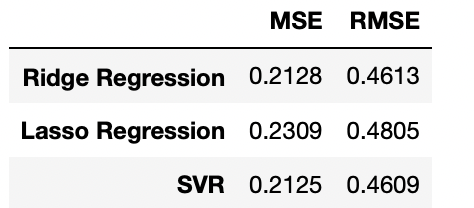

In [36]:
Image(filename='model evaluation2.png',width=300, height=200)

Cross-validation shows that the three models have similar results. Both Ridge Regression and Lasso Regression can be used to solve the overfitting problem in linear regression models, but they are applicable in slightly different situations. Ridge Regression can be used when there are multiple highly correlated features in the data set. Lasso Regression is used when there are a large number of features in the data set, in which case L1 regularisation can make some of the regression coefficients zero, thus enabling feature selection, removing features that have less impact on the prediction results and improving the generalisation ability of the model. SVR can also handle small samples of high-dimensional data, but the model is difficult to interpret. Combining the structure of the data and the interpretability of the model, lasso regression selected as the final model.

### 3.3 Lasso Regression

Here we show the packages that need to be imported and the helper functions.

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

In [38]:
def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = round(mean_squared_error(y, y_hat),3)
    RMSE = round(np.sqrt(mean_squared_error(y, y_hat)),3)
    MAE = round(mean_absolute_error(y, y_hat),3)
    Rsqr = round(r2_score(y, y_hat),3)
    
    Metrics = (MSE,RMSE,MAE,Rsqr)
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  \
                     pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Actual vs Fitted plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res).set_title("Fitted vs Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE,MAE, R^2) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return MSE, RMSE, MAE, Rsqr

In [39]:
def order_weight(x_train, m):
    if 'Lasso' in str(m): 
        coef = m.coef_
        
    else:
        coef = m.coef_[0]
    col_name = x_train.columns
    col_co = [*zip(col_name,coef)]
    col_coef = pd.DataFrame(col_co,columns = ['Feature name', 'Coef'])
    col_coef['Coef_abs'] = abs(col_coef['Coef'])
    col_coef = col_coef.sort_values(by=['Coef_abs'],ascending=False)
     
    return col_coef

We will now proceed with implementing a lasso regression model, which can be found in the linear_model submodule. The Lasso model requires the selection of a tuning parameter, denoted as alpha, to determine the weight of the L1 penalty. Initially, we set alpha to 0.2 as a base value, but we may fine-tune it later for better results.

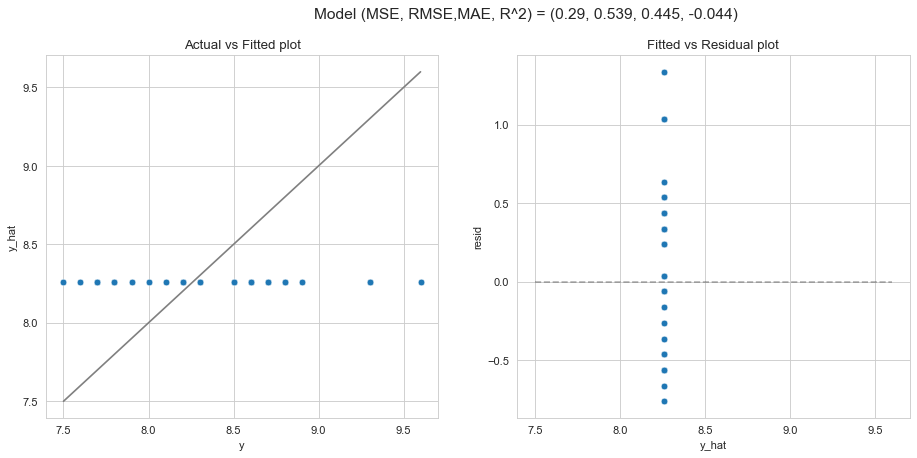

(0.29, 0.539, 0.445, -0.044)

In [40]:
lasso = Lasso(alpha=0.2).fit(x_train,y_train)
model_fit(lasso, x_test, y_test, plot = True)

From the graph above we can see that all the predicted values are now the same. This is due to the value of the alpha parameter being too large, resulting in an overly strong L1 regularisation penalty term, causing the model to reduce the coefficients of most features to zero, retaining only a very small number of non-zero coefficients, resulting in all predicted values being the same.When the value of the alpha parameter is too large, the model tends to be more of a simple model, but may sacrifice the ability to fit the model and therefore requires appropriate tuning of the parameters. We use cross-validation here to determine the best value of the alpha parameter that allows the model to maintain a good performance while balancing the ability to fit and generalise.

### 3.4 Model Tuning

In this section, we first want to determine the rough range of hyperparameters. Therefore, I plotted a line graph showing the test set MSE at different alpha values, and compared it with linear regression.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold

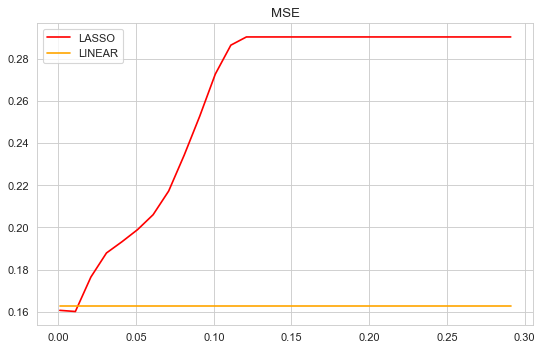

In [42]:
alpharange = np.arange(0.001,0.3,0.01)
lasso_ls, lr_ls = [], []
for alpha in alpharange:
    las = Lasso(alpha=alpha)  
    y_lasso = las.fit(x_train,y_train).predict(x_test)
    mse_lasso = mean_squared_error(y_test, y_lasso)
       
    linear = LinearRegression()
    y_lr = linear.fit(x_train,y_train).predict(x_test)
    mse_lr = mean_squared_error(y_test, y_lr)
    
    lasso_ls.append(mse_lasso)
    lr_ls.append(mse_lr)
plt.plot(alpharange,lasso_ls,color="red",label="LASSO")
plt.plot(alpharange,lr_ls,color="orange",label="LINEAR")
plt.title("MSE")
plt.legend()
plt.show()

From the above graph, it can be observed that the Lasso regression model has the smallest error when the alpha value ranges between 0 to 0.1. Within this range, grid search and five-fold cross validation was used with a step size of 0.001 to find the optimal parameter.

In [43]:
lasso = Lasso()
param_grid = {'alpha': np.arange(0.001, 0.1, 0.001)}

grid_search = GridSearchCV(lasso, param_grid=param_grid,\
                           cv=KFold(10, shuffle=True, random_state=42),\
                           scoring="neg_mean_squared_error").fit(x_train, y_train)

In [44]:
print('Best parameter:', grid_search.best_params_)
print('Best RMSE:', np.sqrt(-grid_search.best_score_))

Best parameter: {'alpha': 0.009000000000000001}
Best RMSE: 0.4354223961599654


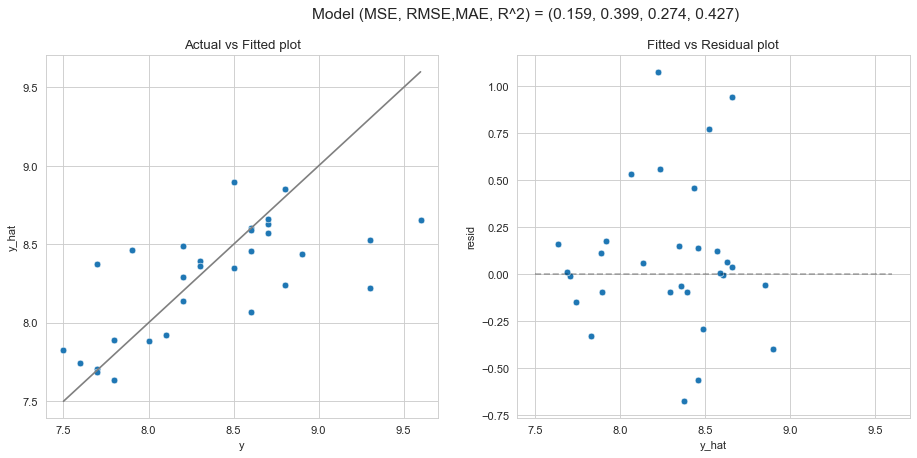

(0.159, 0.399, 0.274, 0.427)

In [45]:
lasso = Lasso(alpha=0.009).fit(x_train,y_train)
model_fit(lasso, x_test, y_test, plot = True)

We can see that when the value of alpha is 0.009, the model performs the best, with an RMSE of 0.399 and a coefficient of determination of 0.427 on the test set. This means that we have found an appropriate model for this dataset.

In [46]:
order_weight(x_train, lasso)

,Feature name,Coef,Coef_abs
1,n_words,0.664807,0.664807
3,season_0,-0.314486,0.314486
12,writer_0,-0.251563,0.251563
8,director_1,-0.190802,0.190802
6,season_3,0.143359,0.143359
7,director_0,-0.133511,0.133511
14,writer_2,0.112547,0.112547
10,director_3,-0.097366,0.097366
11,director_4,-0.060706,0.060706
9,director_2,0.011078,0.011078


Finally, we take the absolute values of the coefficients of the different features, rank them from largest to smallest, and give a discussion of the model in the next section.

## 4. Discussion and Conclusions


### 4.1 Overview

We fit a regression model to predict the IMDB rating of an episode based on different features. First we choose some of the data which we think have more association with the rating. The dataset include 13 features, we droped <mark>episode</mark>, <mark>episode_name</mark>, <mark>total_votes</mark>, <mark>air_date</mark> and <mark>main_chars</mark> according to the reasons mentioned above, and keep <mark>n_words</mark> rather than <mark>n_lines</mark> as it has larger variance. Then we do data preprocessing and feature engineering to gain a more useful dataset for follow-up modelling. In model fitting part, we compare linear regression, lasso regression and support vector regression. We choose lasso regression based on the final RMSE score and setting up an appropriate model after model tuning. Finally, we obtain advices for each feature which may contribute to a higher IMDB rating.

### 4.2 Result and concrete recommendation

From the result of all coeffients of all features in our model, we can see that some of them are negative and some of them are positive. The Valuence of these coeffients gives us a criterion to select the appropriate feature values and thus put forward our own recommendations of this model. The concrete selection criteria is shown below.

<ul>
    <li>For continuous data <mark>n_directions</mark>, <mark>n_words</mark> and <mark>n_speak_char</mark>, if the coefficients of them are larger than 0,they perform a positive impact on the imdb rating; if the coefficients of them are smaller than 0,they perform a negative impact on the imdb rating.
    <li>For categorical data, or those features after encoding in other words, they share the same rule as for continuous data. In detail, if the coefficients of them are larger than 0,they perform a positive impact on the imdb rating; if the coefficients of them are smaller than 0,they perform a negative impact on the imdb rating. 
</ul>

Let us have a deeper look at the coefficients for all features:

For seasons:
<ul>
    <li>From the critera listed above, the binary code for best season is [0,1,1,1], representing the third season.
</ul>

In [47]:
season_best=[0,1,1,1]
df_season=pd.DataFrame(np.array([season_best]),
                       columns=['season_0','season_1','season_2','season_3'])
be_season.inverse_transform(
    df_season[['season_0','season_1','season_2','season_3']])

,season
0,7


For directors:
<ul>
    <li>From the critera listed above, the binary code for best season is [0,0,1,0,0], representing Greg Daniels.
</ul>

In [48]:
director_best=[0,0,1,0,0]
df_director=pd.DataFrame(np.array([director_best]),
                         columns=['director_0','director_1','director_2','director_3','director_4'])
be_director.inverse_transform(
    df_director[['director_0','director_1','director_2','director_3','director_4']])

,director
0,Greg Daniels


For writer:
<ul>
    <li>From the critera listed above, the binary code for best season is [0,0,1,0,0], representing Mindy Kaling.
</ul>

In [49]:
writer_best=[0,0,1,0,0]
df_writer=pd.DataFrame(np.array([writer_best]),
                       columns=['writer_0','writer_1','writer_2','writer_3','writer_4'])
be_writer.inverse_transform(
    df_writer[['writer_0','writer_1','writer_2','writer_3','writer_4']])

,writer
0,Greg Daniels


Finally, we would like to give our own recommendation on how to produce a popular reunion episode. The solution is:

<ol>
    <li>Pick Greg Daniels as the director and the writer.  
    <li>The more words and number of lines containing a stage direction, the better the model will be.  
    <li>Number of different characters with spoken lines in episode is not important, just let the director and writer decide.  
    <li>The main characters featured in the show had little impact on the ratings, and considering this is a reunion episode, it's probably a good idea to include as many as possible.  
    <li>The style of the episode should mimic the characteristics of the seventh season.
</ol>